This notebook analyzes data gathered from the Pokemon computer games. 

Section 1 reviews basic properties of the dataset.

Section 2 demonstrates the use of a variety of linear and nonlinear algorithms. 

Section 3 uses a simple neural network to predict Pokemon type.

## Section 1

In [1]:
import pandas as pd
dataset = pd.read_csv("Pokemon.csv")

In [2]:
print(dataset.head(5))

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


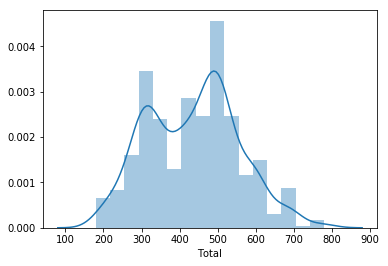

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset["Total"])
plt.show()

There are two peaks on either side of Total=400. Let's plot what the ability scores look like when the dataset is separated about Total=400.

In [5]:
lowTotal  = dataset[dataset['Total'] < 400]
highTotal = dataset[dataset['Total'] > 400]

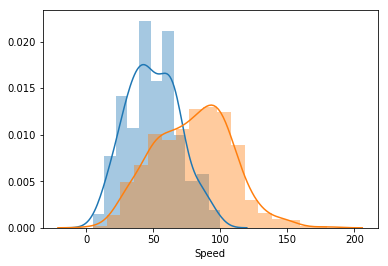

In [7]:
sns.distplot(lowTotal["Speed"])
sns.distplot(highTotal["Speed"])
plt.show()

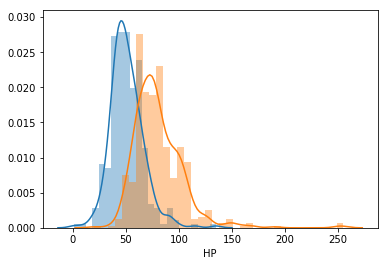

In [8]:
sns.distplot(lowTotal["HP"])
sns.distplot(highTotal["HP"])
plt.show()

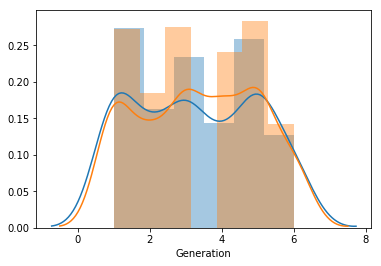

In [9]:
sns.distplot(lowTotal["Generation"])
sns.distplot(highTotal["Generation"])
plt.show()

## Section 2

In [10]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

Simplify the dataset. For now, we will only consider primary-type, i.e. "Type 1". The names and ID numbers are also unnecessary. "Total" is the sum of the other ability scores, so it is taken out for the sake of linear independence. 

In [11]:
dataset = dataset[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Legendary','Generation','Type 1']]

I remove pokemon with primary type 'flying' until I can incorporate more data. There are only three.

In [12]:
dataset = dataset[dataset['Type 1'] != 'Flying']

Current dataset has these columns:

In [13]:
print(dataset.head(5))

   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Legendary  Generation Type 1
0  45      49       49       65       65     45      False           1  Grass
1  60      62       63       80       80     60      False           1  Grass
2  80      82       83      100      100     80      False           1  Grass
3  80     100      123      122      120     80      False           1  Grass
4  39      52       43       60       50     65      False           1   Fire


Break the dataset into X and Y, where Y=Y(X). Furthermore, creating the training set and the validation set.

In [14]:
array = dataset.values
X = array[:,0:8]
Y = array[:,8]
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

The following code applies a variety of machine learning algorithms to the dataset. These algorithms will use the ability scores of a given pokemon to predict its primary type.

In [15]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('MLP-C',MLPClassifier()))
# evaluate each model in turn
results = []
names = []
#set parameters
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=8, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: \t %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 	 0.227700 (0.032303)
LDA: 	 0.237453 (0.026121)
KNN: 	 0.203823 (0.040997)
CART: 	 0.164763 (0.021813)
NB: 	 0.108958 (0.016614)
SVM: 	 0.156351 (0.034873)
MLP-C: 	 0.244382 (0.058498)


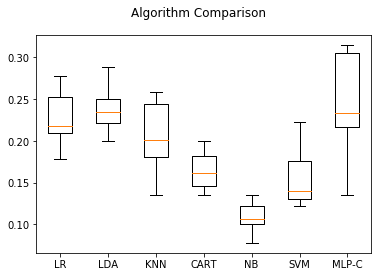

In [16]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The multilayer perceptron classifier (MLP-C) is one of the best performing algorithms. It is further studied in the next section.

## Section 3

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = dataset.drop('Type 1',axis=1)
y = dataset['Type 1']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,100),max_iter=10000000)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         Bug       0.39      0.44      0.41        16
        Dark       0.00      0.00      0.00         6
      Dragon       0.50      0.25      0.33         8
    Electric       0.33      0.30      0.32        10
       Fairy       0.20      0.25      0.22         4
    Fighting       0.00      0.00      0.00         7
        Fire       0.25      0.21      0.23        14
       Ghost       0.45      0.38      0.42        13
       Grass       0.05      0.10      0.07        10
      Ground       0.14      0.10      0.12        10
         Ice       0.00      0.00      0.00         4
      Normal       0.50      0.44      0.47        25
      Poison       0.14      0.09      0.11        11
     Psychic       0.38      0.25      0.30        20
        Rock       0.14      0.20      0.17        10
       Steel       0.40      0.33      0.36         6
       Water       0.26      0.40      0.32        25

   micro avg       0.27   

In [38]:
mlp = MLPClassifier(hidden_layer_sizes=(1000,1000,1000,1000),max_iter=10000000)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         Bug       0.41      0.56      0.47        16
        Dark       0.11      0.17      0.13         6
      Dragon       0.40      0.25      0.31         8
    Electric       0.50      0.30      0.37        10
       Fairy       0.25      0.25      0.25         4
    Fighting       0.10      0.14      0.12         7
        Fire       0.17      0.07      0.10        14
       Ghost       0.42      0.38      0.40        13
       Grass       0.04      0.10      0.06        10
      Ground       0.25      0.30      0.27        10
         Ice       0.00      0.00      0.00         4
      Normal       0.43      0.36      0.39        25
      Poison       0.00      0.00      0.00        11
     Psychic       0.38      0.25      0.30        20
        Rock       0.11      0.10      0.11        10
       Steel       0.50      0.50      0.50         6
       Water       0.19      0.24      0.21        25

   micro avg       0.26   

In [40]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100,100,100,100,100),max_iter=10000000)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         Bug       0.35      0.44      0.39        16
        Dark       0.00      0.00      0.00         6
      Dragon       0.18      0.25      0.21         8
    Electric       0.00      0.00      0.00        10
       Fairy       0.00      0.00      0.00         4
    Fighting       0.30      0.43      0.35         7
        Fire       0.14      0.21      0.17        14
       Ghost       0.50      0.23      0.32        13
       Grass       0.11      0.20      0.14        10
      Ground       0.23      0.30      0.26        10
         Ice       0.00      0.00      0.00         4
      Normal       0.40      0.32      0.36        25
      Poison       0.00      0.00      0.00        11
     Psychic       0.62      0.25      0.36        20
        Rock       0.26      0.50      0.34        10
       Steel       0.18      0.33      0.24         6
       Water       0.08      0.08      0.08        25

   micro avg       0.23   

What have I learned?

1.) The scikit-learn algorithms seem to converge on ~20% for predicting pokemon type.

2.) For the MLP algorithm, there does not seem to be a simple relationship between the number of neurons, the number of hidden layers, and the performance of the algorithm.

What can I do next?

1.) Implement with more computing power and with a larger dataset. I do not have a systematic way of choosing MLP parameters. 
2.) Plot a 2D histogram, performance( nodes, layers ).